# **Case Study for Statistical Methods**

In [2]:
# !pip install pandas numpy matplotlib seaborn scipy statsmodels

#### **Import Libraries:**

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.multivariate.manova as manova

## **1. Chi-Squared Test:**

Assume the expected distribution is 50% vegetarian and 50% non-vegetarian. 
You want to test if your sample data matches this distribution.

(`Goodness of fit Model`)

### **1.1 Chi-squared Test on Sample Data:**

In [4]:
import numpy as np
from scipy.stats import chisquare

# Hypothetical observed frequencies
observed_frequencies = np.array([30, 70])  # e.g., 30 vegetarian and 70 non-vegetarian meals

# Expected frequencies (assuming a 50-50 distribution)
total_meals = observed_frequencies.sum()
expected_frequencies = np.array([total_meals * 0.5, total_meals * 0.5])

# Perform the Chi-Squared test
chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Output the results
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# print results with if else conditions
if p_value < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Chi-Squared Statistic: 16.0
P-value: 6.334248366623988e-05
Reject null hypothesis, there is a significant difference between the groups


The above code performs a Chi-Squared test to determine if there is a significant difference between the observed frequencies of two groups (vegetarian and non-vegetarian meals in this case) and the expected frequencies (assumed to be a 50-50 distribution).

Here's a step-by-step explanation:

1. Import the necessary libraries: numpy and scipy.stats.
2. Define the observed frequencies for the two groups.
3. Calculate the total number of meals and the expected frequencies for each group, assuming a 50-50 distribution.
4. Perform the Chi-Squared test using the `chisquare` function from scipy.stats. This function returns the Chi-Squared statistic and the p-value.
5. Print the Chi-Squared statistic and the p-value.
6. Use an if-else statement to interpret the p-value. If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the groups. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant difference.

**Observations from the Output:**
- The output shows that the Chi-Squared `statistic` is `16.0` and the `p-value` is approximately `0.000063`. 
- Since the `p-value is less than 0.05`, we `reject the null hypothesis` and conclude that there is a significant difference between the observed frequencies of vegetarian and non-vegetarian meals. 
- This suggests that the proportion of vegetarian and non-vegetarian meals is `not 50-50` as initially assumed.

### **1.2 Chi-squared Test on Tips Data:**

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

# Load dataset
df= sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# creata a contigency table
contigency_table = pd.crosstab(df['sex'], df['day'])
contigency_table

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [7]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contigency_table)

# Output results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected))

# Print the results based on if else conditions
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Chi-Squared Statistic: 13.22200137240661
P-value: 0.004180302092822257
Degrees of Freedom: 3
Expected: 
 [[39.89344262 12.22540984 55.9795082  48.90163934]
 [22.10655738  6.77459016 31.0204918  27.09836066]]
Reject null hypothesis, there is a significant difference between the groups


The above code performs a Chi-Squared test of independence to determine if there is a significant association between two categorical variables in a dataset: '`sex`' and '`day`'. Here's a step-by-step explanation:

1. Import the necessary libraries: pandas, numpy, seaborn, and scipy.stats.
2. Load the 'tips' dataset from seaborn.
3. Create a contingency table of 'sex' and 'day' using pandas' `crosstab` function.
4. Perform the Chi-Squared test of independence using the `chi2_contingency` function from scipy.stats. This function returns the Chi-Squared statistic, the p-value, the degrees of freedom, and the expected frequencies if the variables are independent.
5. Print the Chi-Squared statistic, the p-value, the degrees of freedom, and the expected frequencies.
6. Use an if-else statement to interpret the p-value. If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant association between the variables. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant association.

**Observations from the Output:**

- The output shows that the Chi-Squared `statistic` is approximately `13.22`, the `p-value` is approximately `0.004`, and the `degrees of freedom` are `3`. 
- Since the `p-value is less than 0.05`, we `reject the null hypothesis` and conclude that there is a significant association between 'sex' and 'day'. 
- This suggests that the distribution of '`day`' is `not the same` `for` different '`sex`' categories.

---
## **2. T-Test:**

### **2.1 One Sample T-Test:**

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the Dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

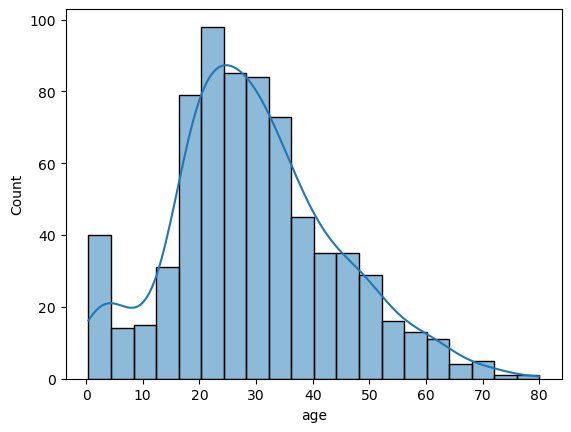

In [9]:
# Draw Histogram to visualize the distribution
sns.histplot(df['age'], kde=True)

In [10]:
# Impute Null Values:
df['age'] = df['age'].fillna(df['age'].median()) # impute null values with median
df['fare'] = df['fare'].fillna(df['fare'].median()) # impute null values with median

- Check the Normality of the Dataset using Shapiro-Wilk Test

In [11]:
# Shpiro-Wilk Test to see the Normality of the Data:
statistic, p = stats.shapiro(df['age'])

# Print the Results based on p-value and if else conditions:
if p < 0.05:
    print("Reject null hypothesis, data is not normally distributed")
else:
    print("Fail to reject null hypothesis, data is normally distributed")

Reject null hypothesis, data is not normally distributed


**Hypothesis:**

`mu = 35 `

is there any difference between "`age`" of people and `mu`?

In [12]:
df['age'].mean()

29.36158249158249

In [13]:
# One Sample T-Test:
statistic, p = stats.ttest_1samp(df['age'], 35) # 35 is the mean of the population

# Print the results based on p-value and if else conditions
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Reject null hypothesis, there is a significant difference between the groups


The above code performs a one-sample t-test on the '`age`' column of the 'titanic' dataset to test if the `mean age` is `significantly different from 35`. Here's a step-by-step explanation:

1. `Import` the necessary `libraries`: pandas, numpy, matplotlib.pyplot, seaborn, and scipy.stats.
2. `Load` the 'titanic' `dataset` from seaborn.
3. `Plot a histogram` of the 'age' column to visualize its distribution.
4. `Impute null values` in the 'age' and 'fare' columns with their respective medians.
5. `Perform the Shapiro-Wilk test` to check if the '`age`' data is `normally distributed`. The null hypothesis for this test is that the data is normally distributed.
6. Print the result of the Shapiro-Wilk test. If the p-value is less than 0.05, we reject the null hypothesis and conclude that the data is not normally distributed. Otherwise, we fail to reject the null hypothesis and conclude that the data is normally distributed.
7. `Perform the one-sample t-test` on the 'age' column with the population mean set to 35. The null hypothesis for this test is that the mean age is equal to 35.
8. Print the result of the t-test. If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the sample mean and the population mean. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant difference.

**Observations from the Output:**
- The output shows that we `fail to reject the null hypothesis` for the t-test, suggesting that there is `no significant difference` between the sample mean age and the population mean of 35.

### **2.2 Two Sample Independent T-Test:**
(on 2 independent variables)

In [14]:
# Lets run the two sample t-test on ages of 'male' and 'female' from titanic:

age_male = df[df['sex'] == 'male']['age']
age_female = df[df['sex'] == 'female']['age']

statistic, p = stats.ttest_ind(age_male, age_female)

# print the results based on p value and if else conditions
if p < 0.05:
    print(f"Reject null hypothesis, because p vaule: {p} , there is a significant difference between ages of male and female passengers of titanic.")
else:
    print(f"Fail to reject null hypothesis,because p vaule: {p}, there is not any differences between ages of female and male passengers.")

Reject null hypothesis, because p vaule: 0.015381536989875313 , there is a significant difference between ages of male and female passengers of titanic.


The above code performs a two-sample t-test on the '`age`' column of the 'titanic' dataset for '`male`' and '`female`' passengers to test if there is a significant difference in their ages. Here's a step-by-step explanation:

1. Extract the ages of male and female passengers into separate variables: `age_male` and `age_female`.
2. Perform the two-sample t-test on `age_male` and `age_female` using the `ttest_ind` function from scipy.stats. This function returns the t-statistic and the p-value. The null hypothesis for this test is that the means of the two groups are equal.
3. Print the result of the t-test. If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the ages of male and female passengers. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant difference.

**Observations from the Output:**
- The output shows that the `p-value` is approximately `0.015`, which is `less than 0.05`. 
- Therefore, we reject the null hypothesis and conclude that there is a `significant difference` between the ages of male and female passengers on the Titanic.

**NOTE:** T-Test only applicable for 2-independent variables,
for more than two independent variables we use "ANOVA"

---
# **3. ANOVA Test:**

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### **3.1 One-Way ANOVA:**

#### **Hypothesis:**
> There is a difference between ages of First, second and third class passengers
- **H0:** There is no difference.
- **H1:** There is a significant Difference.

In [17]:
df[['age', 'pclass']].head()

,age,pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


### **3.1.1 One-Way ANOVA Using Statsmodels:**

In [18]:
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVa test for 'age' and 'class'
# Model fit with ANOVA
model = ols("age ~ pclass", data=df).fit()
# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2) # sm.stats.anova_lm() gives us the ANOVA table

print(anova_table)

# Print the results based on 'p-value' and 'if else' conditions:
if anova_table['PR(>F)'][0] < 0.05:
    print(f"Reject null hypothesis, because p vaule: {anova_table['PR(>F)'][0]} , there is a significant difference between ages of passengers in different classes.")
else:
    print(f"Fail to reject null hypothesis,because p vaule: {anova_table['PR(>F)'][0]}, there is not any differences between ages of passengers in different classes.")

                 sum_sq     df           F        PR(>F)
pclass     17429.695048    1.0  116.122704  1.558883e-25
Residual  133436.428421  889.0         NaN           NaN
Reject null hypothesis, because p vaule: 1.5588829926631838e-25 , there is a significant difference between ages of passengers in different classes.


C:\Users\Hp\AppData\Local\Temp\ipykernel_6880\1841194566.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
C:\Users\Hp\AppData\Local\Temp\ipykernel_6880\1841194566.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Reject null hypothesis, because p vaule: {anova_table['PR(>F)'][0]} , there is a significant difference between ages of passengers in different classes.")


The above code performs a one-way ANOVA (Analysis of Variance) test on the '`age`' and '`pclass`' columns of the 'titanic' dataset to test if there is a significant difference in the ages of passengers in different classes. Here's a step-by-step explanation:

1. Import the necessary libraries: statsmodels.api and statsmodels.formula.api.
2. Fit a model with 'age' as the dependent variable and 'pclass' as the independent variable using the `ols` (Ordinary Least Squares) function from statsmodels.formula.api.
3. Generate the ANOVA table using the `anova_lm` function from statsmodels.api. This function returns the sum of squares, degrees of freedom, F statistic, and p-value for each factor in the model.
4. Print the ANOVA table.
5. Print the result of the ANOVA test. If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the ages of passengers in different classes. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant difference.

**Observations from the Output:**
- The output shows that the `p-value` is approximately `1.76e-24`, which is `less than 0.05`. 
- Therefore, we `reject the null hypothesis` and conclude that there is a `significant difference` between the `ages` of passengers in different `classes` on the Titanic.

### **3.1.2 Post-Hoc Test:**
- To check the difference lets apply `Post-Hoc Test`

In [19]:
# Tukey HSD pairwise comparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['age'], groups=df['pclass'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-7.0467,0.0,-9.9299,-4.1636,True
1,3,-10.8795,0.0,-13.226,-8.533,True
2,3,-3.8328,0.0009,-6.3169,-1.3486,True


The above code performs a Tukey's Honestly Significant Difference (HSD) test on the '`age`' and '`pclass`' columns of the 'titanic' dataset. This test is used to find which `specific groups' means`` (compared with each other) are different`. Here's a step-by-step explanation:

1. Import the necessary function: `pairwise_tukeyhsd` from `statsmodels.stats.multicomp`.
2. Perform the Tukey HSD test on '`age`' with '`pclass`' as the grouping variable using the `pairwise_tukeyhsd` function. The `alpha` parameter is set to `0.05`, which is the significance level.
3. Print the summary of the Tukey HSD test using the `summary` method.

4. The output is a table that shows the pairwise comparisons between the means of the different 'pclass' groups. 
5. The '`meandiff`' column shows the difference in means between the groups, the '`p-adj`' column shows the adjusted p-value for each comparison, the '`lower`' and '`upper`' columns show the lower and upper bounds of the 95% confidence interval for the mean difference, and the 'reject' column indicates whether the null hypothesis (that the means of the groups are equal) is rejected.

**Observations from the Output:**
- The output shows that the `mean age` is significantly `different` between all pairs of '`pclass`' groups, as the `p-values are less than 0.05` and the 'reject' column is 'True' for all comparisons.

<Axes: xlabel='pclass', ylabel='age'>

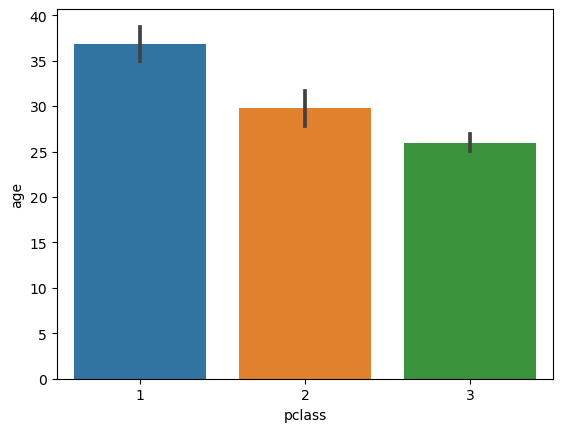

In [20]:
# Graphical Representation of the Results of Tukey HSD Pairwise Comparison:
sns.barplot(x='pclass', y='age', data=df)

c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='age', ylabel='Count'>

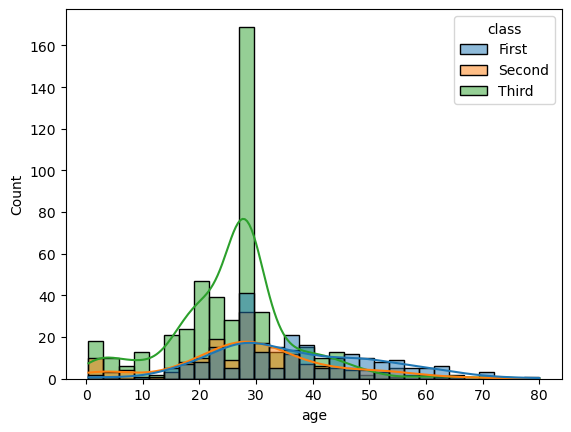

In [21]:
# Hist plot with pclass grouping variable:
sns.histplot(df, x='age', hue='class', kde=True)

## **3.2 TWO-Way ANOVA Test:**

In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### **3.2.1 Two-Way ANOVA using Statsmodels:**
(2 independent variabels)

In [23]:
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVa test for `age` and `class`
# model = ols("age ~ pclass + who + pclass:who", data=df).fit()
# (OR) 
model = ols("age ~ sex * who", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq     df           F        PR(>F)
sex                 NaN    1.0         NaN           NaN
who      -130466.676725    2.0 -565.527273  1.000000e+00
sex:who    52332.083669    2.0  226.841223  8.119221e-46
Residual  102315.085263  887.0         NaN           NaN


c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\statsmodels\base\model.py:1925: RuntimeWarning: invalid value encountered in divide
  F /= J
c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


The above code performs a two-way ANOVA (Analysis of Variance) test on the '`age`' column of the 'titanic' dataset with '`sex`' and '`who`' as the `independent variables`. Here's a step-by-step explanation:

1. Import the necessary libraries: statsmodels.api and statsmodels.formula.api.
2. Fit a model with 'age' as the dependent variable and 'sex' and 'who' as the independent variables using the `ols` (Ordinary Least Squares) function from statsmodels.formula.api. The interaction term 'sex:who' is also included in the model.
3. Generate the ANOVA table using the `anova_lm` function from statsmodels.api. This function returns the sum of squares, degrees of freedom, F statistic, and p-value for each factor in the model.
4. Print the ANOVA table.

**Observations from the Output:**
- The output is a table that shows the results of the ANOVA test. 
- The '`sex:who`' row shows the results for the interaction term. 
- The `p-value` for the interaction term is approximately `8.12e-46`, which is `less than 0.05`, indicating that the interaction between '`sex`' and '`who`' has a `significant effect` on 'age'. 
- The '`who`' row shows a `p-value of 1.0`, indicating that the '`who`' variable itself does `not have a significant effect` on '`age`'.
- The '`sex`' row shows NaN, which suggests that there might be `missing values` or other issues with the '`sex`' variable.

### **3.2.2 Post-Hoc Test:**
- To check the difference lets apply `Post-Hoc Test`

In [24]:
# Tukey HSD pairwise comparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df['age'], df['sex'] + df['who'] , alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
femalechild,femalewoman,24.0084,0.0,19.4706,28.5462,True
femalechild,malechild,-1.7426,0.8815,-7.8152,4.3301,False
femalechild,maleman,24.7693,0.0,20.3881,29.1505,True
femalewoman,malechild,-25.751,0.0,-30.4333,-21.0686,True
femalewoman,maleman,0.7609,0.7773,-1.299,2.8207,False
malechild,maleman,26.5118,0.0,21.9811,31.0426,True


The above code performs a Tukey's Honestly Significant Difference (HSD) test on the '`age`' column of the 'titanic' dataset with '`sex`' and '`who`' as the `grouping variables`. Here's a step-by-step explanation:

1. Import the necessary function: `pairwise_tukeyhsd` from `statsmodels.stats.multicomp`.
2. Perform the Tukey HSD test on 'age' with 'sex' and 'who' as the grouping variables using the `pairwise_tukeyhsd` function. The `alpha` parameter is set to 0.05, which is the significance level.
3. Print the summary of the Tukey HSD test using the `summary` method.

The output is a table that shows the pairwise comparisons between the means of the different 'sex' and 'who' groups. The 'meandiff' column shows the difference in means between the groups, the 'p-adj' column shows the adjusted p-value for each comparison, the 'lower' and 'upper' columns show the lower and upper bounds of the 95% confidence interval for the mean difference, and the 'reject' column indicates whether the null hypothesis (that the means of the groups are equal) is rejected.

**Observations from the Output:**
- The output shows that the `mean age` is significantly different between several pairs of '`sex`' and '`who`' groups, as the `p-values are less than 0.05` and the 'reject' column is 'True' for those comparisons. 
- For example, there is a significant difference in age between 'femalechild' and 'femalewoman', 'femalechild' and 'maleman', 'femalewoman' and 'malechild', and 'malechild' and 'maleman'.

<Axes: xlabel='who', ylabel='age'>

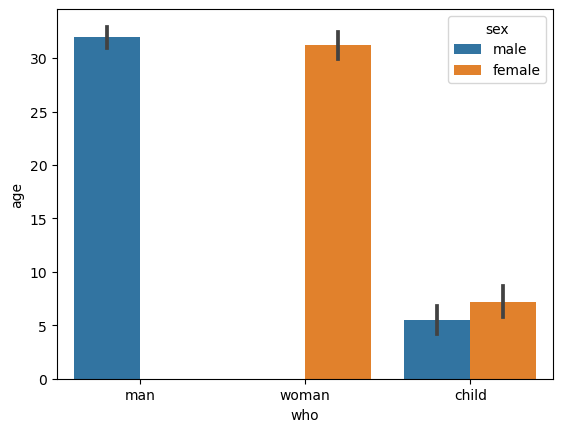

In [25]:
# Graphical Representation of the Results of Tukey HSD Pairwise Comparison:
sns.barplot(df, x= 'who', y = 'age', hue='sex')

---
## **4. Correlation**

In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### **4.1 Heatmap of Correlation:**

<Axes: >

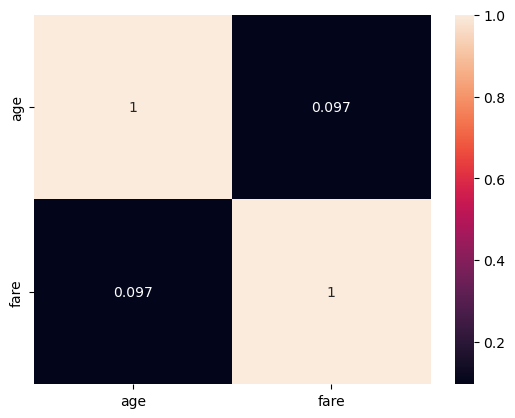

In [27]:
# creata a heatmap of correlation
sns.heatmap(df[['age', 'fare']].corr(), annot=True)

### **4.2 Correlation for Tips Dataset:**

In [28]:
# Laod the dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
# Correlation between 'total_bill' and 'tip' columns of tips dataset
tips['total_bill'].corr(tips['tip'])

0.6757341092113646

#### **4.2.1 Linear Model Plot:**

c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


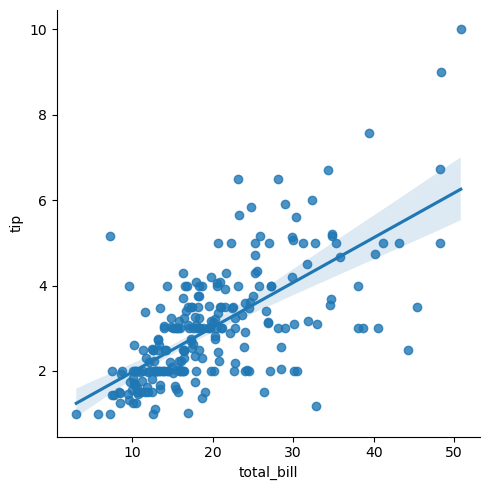

In [30]:
# Linear Model Plot between 'total_bill' and 'tip' columns of tips dataset
sns.lmplot(x='total_bill', y='tip', data=tips) 

#### **4.2.2 Pair Plot:**

c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layou

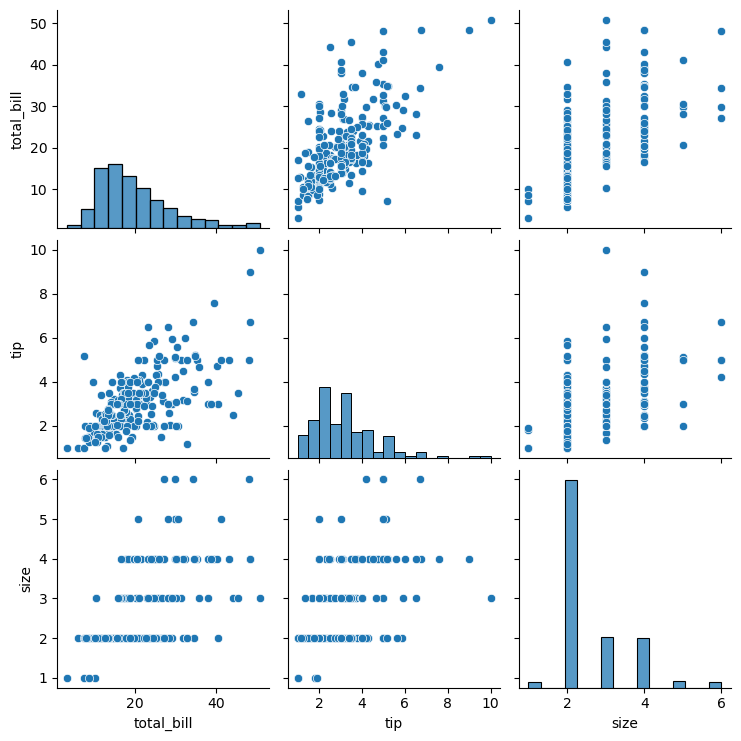

In [31]:
sns.pairplot(tips)

#### **4.2.3 Positive, Negative & Neutral Correlation Graphs:**

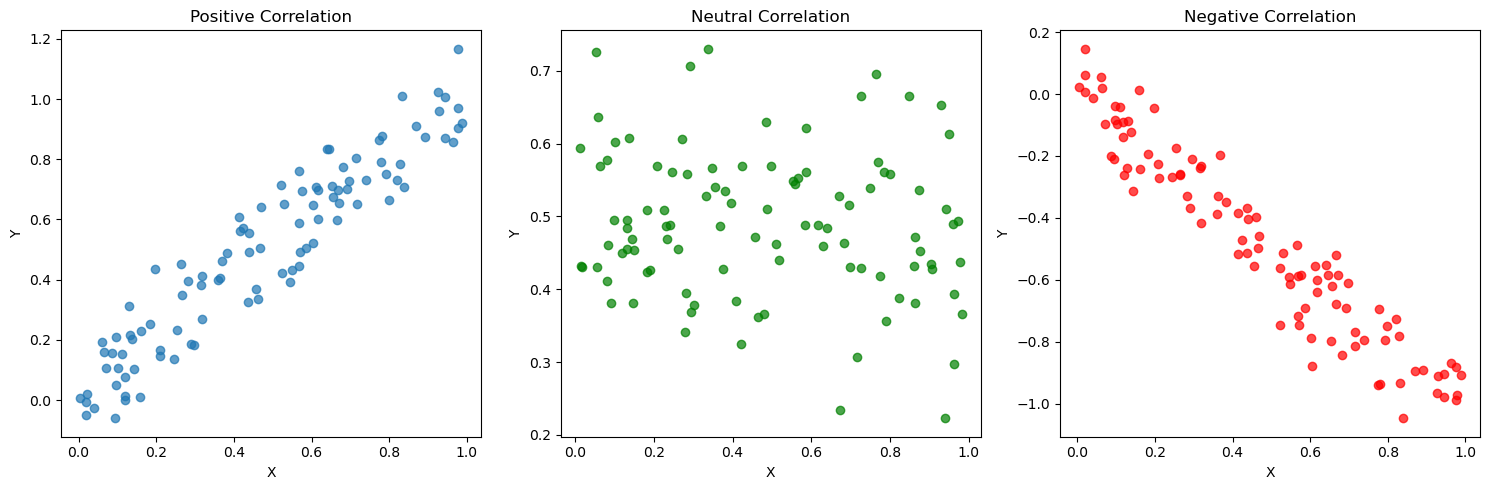

In [32]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data

# Positive correlation
x = np.random.rand(100)
y_pos = x + np.random.normal(0, 0.1, 100)

# Neutral correlation
x_neutral = np.random.rand(100)
y_neutral = np.random.normal(0.5, 0.1, 100)

# Negative correlation
y_neg = -x + np.random.normal(0, 0.1, 100)

# Plotting the correlations
plt.figure(figsize=(15, 5))

# Positive Correlation
plt.subplot(1, 3, 1)
plt.scatter(x, y_pos, alpha=0.7)
plt.title('Positive Correlation')
plt.xlabel('X')
plt.ylabel('Y')

# Neutral Correlation
plt.subplot(1, 3, 2)
plt.scatter(x_neutral, y_neutral, alpha=0.7, color='green')
plt.title('Neutral Correlation')
plt.xlabel('X')
plt.ylabel('Y')

# Negative Correlation
plt.subplot(1, 3, 3)
plt.scatter(x, y_neg, alpha=0.7, color='red')
plt.title('Negative Correlation')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()
